In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
sys.path.append("..")
import magic_moment_method.vehicle_params as vehicle_params
import magic_moment_method.state_solver as state_solver

In [14]:
x = state_solver.Solver(vehicle_params.EasyDriver())
result = x.solve(state_solver.State(0 * np.pi / 180, 0 * np.pi/180, 15, -1, False)) # body_slip, steered_angle, s_dot, torque_request, is_left_bias
tires = ["front_left","front_right", "rear_left", "rear_right"]

In [15]:
slip_ratios = np.linspace(-0.25, 0.25, 31)
slip_angles = np.linspace(-1 * np.pi / 12, np.pi / 12, 31)
normal_loads = np.array([500])
colors = np.array(["r", "g", "b"])

In [16]:
SR_dict = dict()
SA_dict = dict()

for slip_ratio in slip_ratios:
    SR_dict[slip_ratio] = []

for slip_angle in slip_angles:
    SA_dict[slip_angle] = []

In [17]:
outputs = []
for load in normal_loads:
    for slip_angle in slip_angles:
        for slip_ratio in slip_ratios:
            comstock_output = x.vehicle.suspension._Suspension__tires.rear_right.get_comstock_forces(slip_ratio, slip_angle, load, 0)
            SR_dict[slip_ratio].append([comstock_output[0], comstock_output[1]])
            SA_dict[slip_angle].append([comstock_output[0], comstock_output[1]])

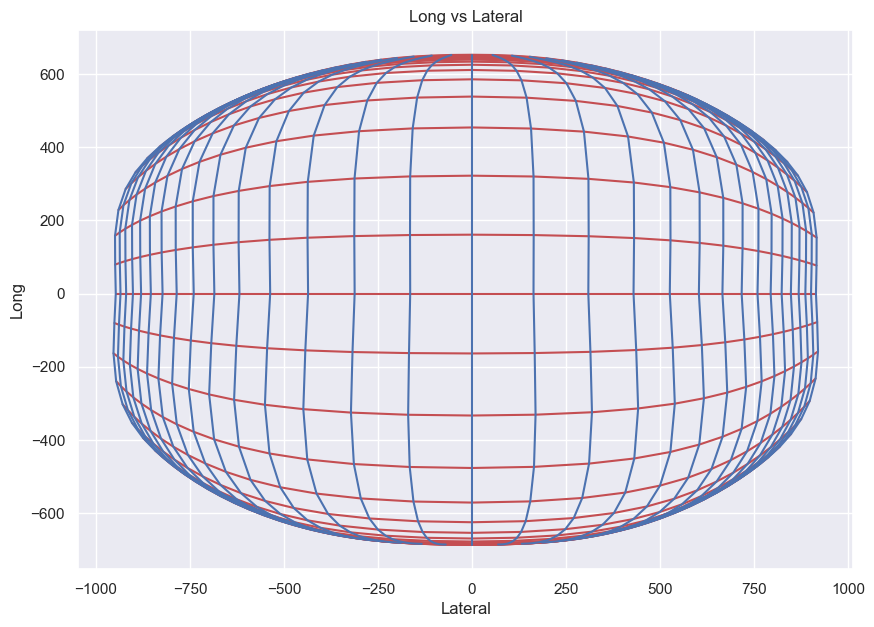

In [18]:
sns.set_theme(style="darkgrid", palette='deep')
sns.set(rc = {'figure.figsize':(10,7)})

for slip_ratio in SR_dict:
    forces = [[], []]
    slip = slip_ratio
    for force in SR_dict[slip_ratio]:
        forces[0].append(force[0])
        forces[1].append(force[1])
    
    plt.plot(forces[1], forces[0], 'r')
    
for slip_angle in SA_dict:
    forces = [[], []]
    slip = slip_angle
    for force in SA_dict[slip_angle]:
        forces[0].append(force[0])
        forces[1].append(force[1])
    
    plt.plot(forces[1], forces[0], 'b')
    
plt.xlabel("Lateral")
plt.ylabel("Long")
plt.title("Long vs Lateral")
plt.show()